In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

In [2]:
path = r"..\..\S02_datasets\Brain_tumor"

bt_path = os.path.join(path, 'Brain Tumor.csv')
bt_t3_path = os.path.join(path, 'bt_dataset_t3.csv')

In [3]:
bt_df = pd.read_csv(bt_path)
bt_df.shape

(3762, 15)

In [4]:
bt_df.head(2)

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155


In [5]:
bt_df.dtypes

Image                  object
Class                   int64
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
dtype: object

In [18]:
X = bt_df.iloc[:, 2:-1]

In [19]:
X.mean(axis=0)

Mean                    9.488890
Variance              711.101063
Standard Deviation     25.182271
Entropy                 0.073603
Skewness                4.102727
Kurtosis               24.389071
Contrast              127.961459
Energy                  0.204705
ASM                     0.058632
Homogeneity             0.479252
Dissimilarity           4.698498
Correlation             0.955767
dtype: float64

In [20]:
# Datos normalizados
X_std = (X - X.mean(axis=0))/X.std(axis=0)

In [26]:
X_mean = np.mean(X_std, axis=0)

# Calculo de matriz de covarianza
cov_matrix = (X_std - X_mean).T.dot((X_std - X_mean))/(X_std.shape[0]-1)

# Calculo de valores y vectores propios
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vals, eig_vecs

(array([4.90580127e+00, 3.75589772e+00, 1.54491165e+00, 7.51781548e-01,
        5.74136703e-01, 2.40065025e-01, 1.29191528e-01, 4.01132334e-02,
        3.06366755e-02, 6.44700117e-05, 1.07013717e-02, 1.66988010e-02]),
 array([[ 1.36943174e-03,  4.29053945e-01,  2.54168149e-01,
         -3.80815552e-01,  2.39604973e-01,  2.66155771e-01,
         -5.89278264e-01,  3.36859675e-01, -9.60416311e-02,
         -5.54591452e-03,  8.90601712e-02,  1.13880660e-02],
        [-1.60192825e-01,  4.20574153e-01,  2.74990715e-01,
         -2.25068392e-01, -1.62014901e-01, -2.14102548e-01,
          4.04552866e-01,  6.15755860e-03, -3.33629783e-01,
          6.81121505e-03, -4.46201243e-01,  3.53467858e-01],
        [-1.49575575e-01,  4.44042821e-01,  2.46728233e-01,
         -1.28698555e-01, -1.61386185e-01, -1.99132152e-01,
          2.50215051e-01, -2.05643795e-01,  3.07294499e-01,
         -7.55869290e-03,  4.62750284e-01, -4.73068766e-01],
        [ 4.02581652e-01, -1.09882624e-01,  2.78138676e-01,

In [29]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eigen_pairs.sort(reverse=True)

In [31]:
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [32]:
var_exp

[40.88167728688417,
 31.299147689886723,
 12.874263734077603,
 6.264846232358131,
 4.784472525710034,
 2.0005418709701512,
 1.0765960635875205,
 0.3342769453505065,
 0.2553056288084352,
 0.13915667474024568,
 0.08917809752889082,
 0.0005372500975896435]

In [33]:
cum_var_exp

array([ 40.88167729,  72.18082498,  85.05508871,  91.31993494,
        96.10440747,  98.10494934,  99.1815454 ,  99.51582235,
        99.77112798,  99.91028465,  99.99946275, 100.        ])

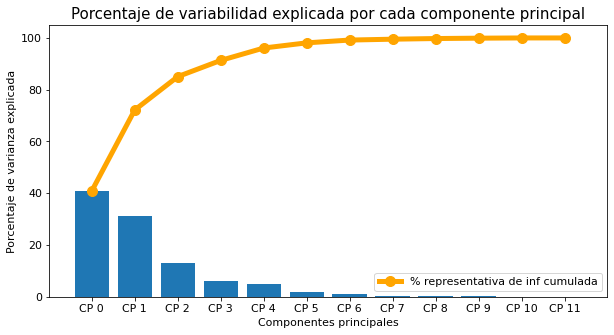

In [38]:
plt.figure(figsize=(10, 5))

x=["CP %s"%i for i in range(len(var_exp))]

plt.bar(x, var_exp)
plt.plot(x, cum_var_exp, '.-', label="% representativa de inf cumulada", c='orange', linewidth=5, markersize=20)

plt.xlabel("Componentes principales", fontsize=11)
plt.ylabel("Porcentaje de varianza explicada", fontsize=11)
plt.title("Porcentaje de variabilidad explicada por cada componente principal", fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(loc='best', fontsize=11)